# Comparación de  los métodos de regresión logística y de bayesiano ingenuo.

In [1]:
# -*- coding: utf-8 -*- 
# Librerias utilizadas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display

## Clasificación de Spam.

## Carga de los datos de Spam:

In [2]:
df_spam =  pd.read_csv("nb_data/spam.csv",delim_whitespace=True,header=None)
df_spam.shape

(5172, 2001)

In [3]:
X = df_spam.as_matrix()

perm = np.random.permutation(X.shape[0])
X= X[perm,:]

X_train =  X[:int(X.shape[0] * 0.8),:]
X_test = X[int(X.shape[0] * 0.8):,:]

y_train= X_train[:,2000:2001]
y_train = y_train.reshape(4137,)
X_train= X_train[:,0:2000]

y_test= X_test[:,2000:2001]
X_test= X_test[:,0:2000]



In [4]:
def logistica(z):
    return 1 / (1 + np.exp(-z))

# calcula el gradiente 
def gradiente(X, y, p):
    return np.dot(X.T, p - y) / y.size

# realiza descenso del gradiente para regresión logística
def descenso_gradiente(X, y, umbral_convergencia = 0.01, alpha = 0.1):
    # inicializa los parámetros de forma aleatoria
    theta_anterior = np.zeros(X.shape[1])
    theta_nuevo = np.random.rand(X.shape[1])

    # calcula cambio entre parámetros nuevos y anteriores (distancia euclideana)
    distancia_theta = np.linalg.norm(theta_nuevo - theta_anterior)
    
    it = 0
    while distancia_theta > umbral_convergencia:
        # parámetros nuevos se vuelven los anteriores
        theta_anterior = theta_nuevo

        # calcula la probabilidad de que datos sean de la clase 1 con los parámetros anteriores
        p = logistica(np.dot(X, theta_anterior)) # p = logistica(X theta)

        # actualiza parámetros en la dirección del gradiente
        theta_nuevo = theta_anterior - alpha * gradiente(X, y, p)

        # calcula cambio entre parámetros nuevos y anteriores (distancia euclideana)
        distancia_theta = np.linalg.norm(theta_nuevo - theta_anterior)

        it = it + 1
        #print "Iteración", it, "theta_nuevo =", theta_nuevo,\
              #"Cambio =", distancia_theta

    return theta_nuevo,it

def get_ROC(y_score,y_train):
    fp_l = []
    tp_l=[]
    step = 0.01
    for i in range(0, 101):
        cutoff = i * step

        tp_count = 0 # true positives
        p_count = 0 # all positives, false or not

        fp_count = 0 # true negatives
        n_count = 0 # all negatives, false or not

        errors = 0
        count = 0

        for ind in range(len(y_score)):
            if float(y_score[ind])>= cutoff:
                if int(y_train[ind]) ==1:
                    tp_count= tp_count+1
                    p_count = p_count +1
                else:
                    fp_count = fp_count+1
                    n_count = n_count +1 
                    errors = errors+1
            else:
                if int(y_train[ind]) ==1:
                    p_count = p_count +1
                    errors = errors +1 
                else:
                    n_count = n_count +1 
            count = count + 1
        if n_count == 0:
            fp = 0
        else:
            fp = float(fp_count) / float(n_count)
        if p_count == 0:
            tp = 0
        else:
            tp = float(tp_count) / float(p_count)

        #print("%.4f %.4f %.4f" % (fp, tp, errors / count))
        #print("%.4f %.4f" % (fp, tp))
        fp_l.append(fp)
        tp_l.append(tp)
    return fp_l,tp_l

def plot_ROC(fp_l,tp_l,umbral,alpha):
    fig = plt.figure(num=None, figsize=(4,4), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.set_yscale('linear')
    plt.plot(fp_l, tp_l,label='Here')
    ax.legend()
    plt.show()
    


# Modelos de regresión logistica con diferentes parametros vs Naive Bayes

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing, metrics


clf = MultinomialNB()
clf.fit(X_train, y_train)

predicciones = clf.predict(X_train)

predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(X_train.shape[0])
#print total_datos

for ind in range(len(predicciones)):
    if int(predicciones[ind])==int(y_train[ind]):
        aciertos+=1


#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"


fp_naive, tp_naive, thresholds = metrics.roc_curve(y_train,predicciones, pos_label=1)
print("AUC de Naive Bayes usando una distribucion Multinomial: {0}".format(metrics.auc(fp_naive, tp_naive)))


El porcentaje de aciertos es el siguiente:
95.2139231327%
AUC de Naive Bayes usando una distribucion Multinomial: 0.947297668638


El numero de iteraciones que se realizaron fueron:36 
Con alpha = 0.100000 y un umbral =0.100000
El numero de iteraciones que se realizaron fueron:26 
Con alpha = 0.300000 y un umbral =0.100000
El numero de iteraciones que se realizaron fueron:28 
Con alpha = 0.500000 y un umbral =0.100000
El numero de iteraciones que se realizaron fueron:1 
Con alpha = 0.010000 y un umbral =0.100000


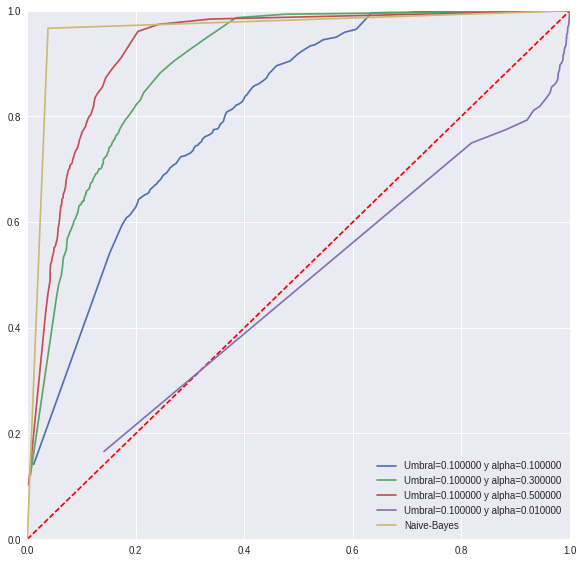

El numero de iteraciones que se realizaron fueron:27 
Con alpha = 0.100000 y un umbral =0.140000
El numero de iteraciones que se realizaron fueron:20 
Con alpha = 0.300000 y un umbral =0.140000
El numero de iteraciones que se realizaron fueron:19 
Con alpha = 0.500000 y un umbral =0.140000
El numero de iteraciones que se realizaron fueron:1 
Con alpha = 0.010000 y un umbral =0.140000


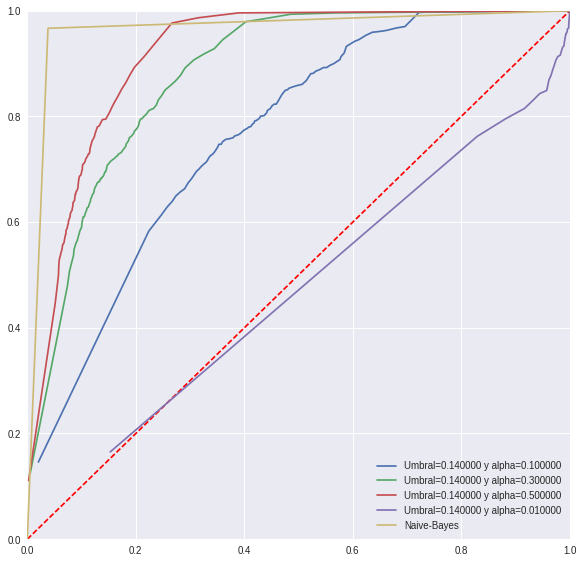

In [30]:
#umbrales_convergencia = [0.1,0.01,0.0001,0.0001]
#alpha_s = [0.1,0.15,0.2,0.5]

#Test_Code#
umbrales_convergencia = [0.1,0.14]
alpha_s = [0.1,0.3,0.5,0.01]
iteraciones_log=[]
thetas_ml=[]
for umbral in umbrales_convergencia:
    fig = plt.figure(num=None, figsize=(10,10), dpi=70, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.set_yscale('linear')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    thetas_ml=[]
    for alp in alpha_s:
        theta_emv,N_iteraciones = descenso_gradiente(X_train, y_train,umbral_convergencia=umbral,alpha=alp)
        thetas_ml.append((theta_emv,N_iteraciones,alp))
        print "================================================================"
        print ("El numero de iteraciones que se realizaron fueron:%i \nCon alpha = %f y un umbral =%f" % (N_iteraciones,alp,umbral))
        print "================================================================" 
        y_score = logistica(np.dot(X_train, theta_emv))
        fp_l, tp_l = get_ROC(y_score,y_train)
        #print fp_l, tp_l
        plt.plot(fp_l, tp_l,label='Umbral=%f y alpha=%f'%(umbral,alp))
    iteraciones_log.append((umbral,thetas_ml))
    plt.plot(fp_naive,tp_naive,label='Naive-Bayes')
    ax.legend()
    plt.show()

# Analisis de Spam haciendo uso de de los datos de prueba:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing, metrics


clf = MultinomialNB()
clf.fit(X_train, y_train)

predicciones = clf.predict(X_test)

predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(X_test.shape[0])
#print total_datos

for ind in range(len(predicciones)):
    if int(predicciones[ind])==int(y_test[ind]):
        aciertos+=1


#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"


fp_naive, tp_naive, thresholds = metrics.roc_curve(y_test,predicciones, pos_label=1)
print("AUC de Naive Bayes usando una distribucion Multinomial: {0}".format(metrics.auc(fp_naive, tp_naive)))


El porcentaje de aciertos es el siguiente:
96.3285024155%
AUC de Naive Bayes usando una distribucion Multinomial: 0.964315134837


In [27]:
print iteraciones_log[0]

(0.1, [(array([ 0.3936665 ,  0.8639533 ,  0.53117568, ...,  0.9464094 ,
        0.32462982,  0.68799509]), 34, 0.1), (array([ 0.01492729,  0.64696394,  0.77223292, ...,  0.31610958,
        0.04575643,  0.39881567]), 24, 0.3), (array([-0.00814053,  0.72712117,  0.54217906, ...,  0.04590331,
        0.85112842,  0.98082406]), 27, 0.5), (array([ 0.55348975,  0.3952426 ,  0.4657618 , ...,  0.6725657 ,
        0.04338156,  0.83574711]), 1, 0.01)])


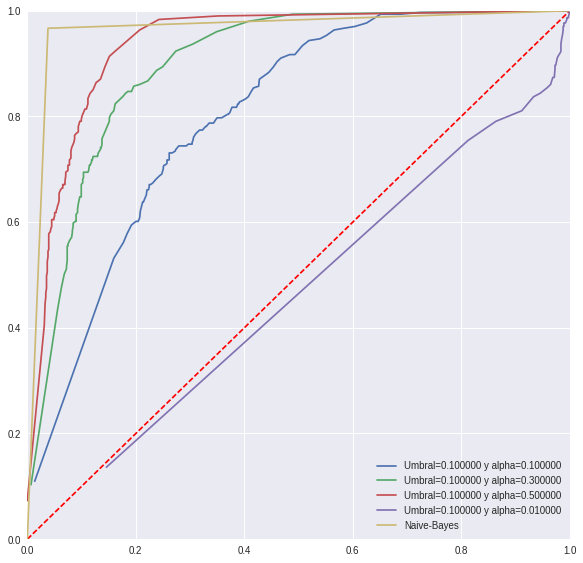

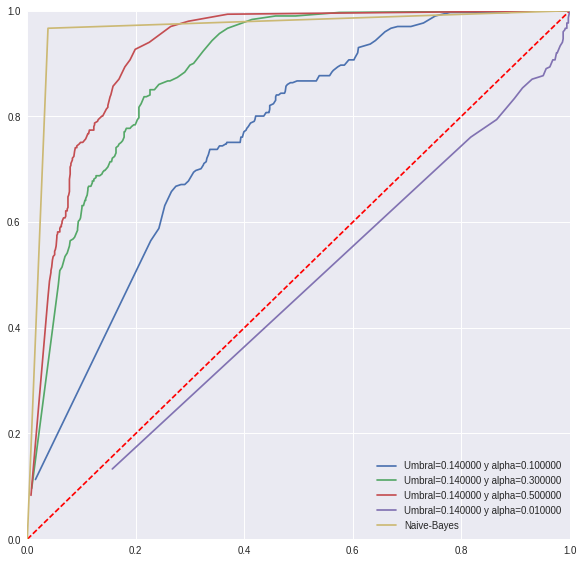

In [31]:
#umbrales_convergencia = [0.1,0.01,0.0001,0.0001]
#alpha_s = [0.1,0.15,0.2,0.5]

#Test_Code#
for iteraciones in iteraciones_log:
    fig = plt.figure(num=None, figsize=(10,10), dpi=70, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.set_yscale('linear')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    for valores in iteraciones[1]:
        umbral= iteraciones[0]
        alp =  valores[2]
        theta_emv  = valores[0]
        y_score = logistica(np.dot(X_test, theta_emv))
        fp_l, tp_l = get_ROC(y_score,y_test)
        plt.plot(fp_l, tp_l,label='Umbral=%f y alpha=%f'%(umbral,alp))
        ax.legend()
    plt.plot(fp_naive,tp_naive,label='Naive-Bayes')
    ax.legend()
    plt.show()

## Clasificación de cancer de seno.

## Carga de datos de cancer:

In [15]:
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data -O breast_cancer_wisconsin.data  
#!mv breast_cancer_wisconsin.data nb_data/

In [2]:
df_cancer = pd.read_csv("nb_data/breast_cancer_wisconsin.data",delimiter=",",header=None)
print df_cancer.shape

(699, 11)


Recordemos que nuestro data_set tiene alguno valores faltantes los cules quitaremos para hacer nuestro analisis.

In [3]:
print "El tamaño original de nuestro conjunto de datos es:"
print df_cancer.shape

#Primero lo que haremos sera remplazar el valor de '?' por el valor de NaN
df_cancer_reemplazo = df_cancer.replace('?',np.nan)

# Se eliminan los registros que tienen algun Valor NAn
df_cancer_sin_nan = df_cancer_reemplazo.dropna()
# Obtengo los registros que elimine para ver como son.
only_na = df_cancer_reemplazo[~df_cancer_reemplazo.index.isin(df_cancer_sin_nan.index)]

print "La cantidad de registros con valores missing son 16:"
print only_na.shape

print "Al final nos quedamos con un conjunto de datos:"
print df_cancer_sin_nan.shape

print ("\n")
print "===Los registros que quitamos son los siguientes:==="
print only_na

El tamaño original de nuestro conjunto de datos es:
(699, 11)
La cantidad de registros con valores missing son 16:
(16, 11)
Al final nos quedamos con un conjunto de datos:
(683, 11)


===Los registros que quitamos son los siguientes:===
          0   1   2   3   4   5    6   7   8   9   10
23   1057013   8   4   5   1   2  NaN   7   3   1   4
40   1096800   6   6   6   9   6  NaN   7   8   1   2
139  1183246   1   1   1   1   1  NaN   2   1   1   2
145  1184840   1   1   3   1   2  NaN   2   1   1   2
158  1193683   1   1   2   1   3  NaN   1   1   1   2
164  1197510   5   1   1   1   2  NaN   3   1   1   2
235  1241232   3   1   4   1   2  NaN   3   1   1   2
249   169356   3   1   1   1   2  NaN   3   1   1   2
275   432809   3   1   3   1   2  NaN   2   1   1   2
292   563649   8   8   8   1   2  NaN   6  10   1   4
294   606140   1   1   1   1   2  NaN   2   1   1   2
297    61634   5   4   3   1   2  NaN   2   3   1   2
315   704168   4   6   5   6   7  NaN   4   9   1   2
321   7

In [4]:
X = df_cancer_sin_nan.as_matrix().astype(int)

perm = np.random.permutation(X.shape[0])
X= X[perm,:]

X_train =  X[:int(X.shape[0] * 0.8),:]
X_test = X[int(X.shape[0] * 0.8):,:]

y_train = X_train[:,10]
y_train[y_train ==2] = 0
y_train[y_train ==4] = 1

X_train= X_train[:,1:9]

y_test = X_test[:,10]
X_test= X_test[:,1:9]
y_test[y_test ==2] = 0
y_test[y_test ==4] = 1

In [5]:
def logistica(z):
    return 1 / (1 + np.exp(-z))

# calcula el gradiente 
def gradiente(X, y, p):
    return np.dot(X.T, p - y) / y.size

# realiza descenso del gradiente para regresión logística
def descenso_gradiente(X, y, umbral_convergencia = 0.01, alpha = 0.1):
    # inicializa los parámetros de forma aleatoria
    theta_anterior = np.zeros(X.shape[1])
    theta_nuevo = np.random.rand(X.shape[1])

    # calcula cambio entre parámetros nuevos y anteriores (distancia euclideana)
    distancia_theta = np.linalg.norm(theta_nuevo - theta_anterior)
    
    it = 0
    while distancia_theta > umbral_convergencia:
        # parámetros nuevos se vuelven los anteriores
        theta_anterior = theta_nuevo

        # calcula la probabilidad de que datos sean de la clase 1 con los parámetros anteriores
        p = logistica(np.dot(X, theta_anterior)) # p = logistica(X theta)

        # actualiza parámetros en la dirección del gradiente
        theta_nuevo = theta_anterior - alpha * gradiente(X, y, p)

        # calcula cambio entre parámetros nuevos y anteriores (distancia euclideana)
        distancia_theta = np.linalg.norm(theta_nuevo - theta_anterior)

        it = it + 1
        #print "Iteración", it, "theta_nuevo =", theta_nuevo,\
              #"Cambio =", distancia_theta

    return theta_nuevo,it

def get_ROC(y_score,y_train):
    fp_l = []
    tp_l=[]
    step = 0.01
    for i in range(0, 101):
        cutoff = i * step

        tp_count = 0 # true positives
        p_count = 0 # all positives, false or not

        fp_count = 0 # true negatives
        n_count = 0 # all negatives, false or not

        errors = 0
        count = 0

        for ind in range(len(y_score)):
            if float(y_score[ind])>= cutoff:
                if int(y_train[ind]) ==1:
                    tp_count= tp_count+1
                    p_count = p_count +1
                else:
                    fp_count = fp_count+1
                    n_count = n_count +1 
                    errors = errors+1
            else:
                if int(y_train[ind]) ==1:
                    p_count = p_count +1
                    errors = errors +1 
                else:
                    n_count = n_count +1 
            count = count + 1
        if n_count == 0:
            fp = 0
        else:
            fp = float(fp_count) / float(n_count)
        if p_count == 0:
            tp = 0
        else:
            tp = float(tp_count) / float(p_count)

        #print("%.4f %.4f %.4f" % (fp, tp, errors / count))
        #print("%.4f %.4f" % (fp, tp))
        fp_l.append(fp)
        tp_l.append(tp)
    return fp_l,tp_l

def plot_ROC(fp_l,tp_l,umbral,alpha):
    fig = plt.figure(num=None, figsize=(4,4), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.set_yscale('linear')
    plt.plot(fp_l, tp_l,label='Here')
    ax.legend()
    plt.show()
    

# Modelos de regresión logistica con diferentes parametros vs Naive Bayes

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing, metrics


clf = GaussianNB()
clf.fit(X_train, y_train)

predicciones = clf.predict(X_train)

predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(X_train.shape[0])
#print total_datos

for ind in range(len(predicciones)):
    if int(predicciones[ind])==int(y_train[ind]):
        aciertos+=1


#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"


fp_naive, tp_naive, thresholds = metrics.roc_curve(y_train,predicciones, pos_label=1)
print("AUC de Naive Bayes usando una distribucion Multinomial: {0}".format(metrics.auc(fp_naive, tp_naive)))


El porcentaje de aciertos es el siguiente:
96.1538461538%
AUC de Naive Bayes usando una distribucion Multinomial: 0.964387755102


El numero de iteraciones que se realizaron fueron:5 
Con alpha = 0.100000 y un umbral =0.100000
El numero de iteraciones que se realizaron fueron:1 
Con alpha = 0.010000 y un umbral =0.100000
El numero de iteraciones que se realizaron fueron:1 
Con alpha = 0.001000 y un umbral =0.100000


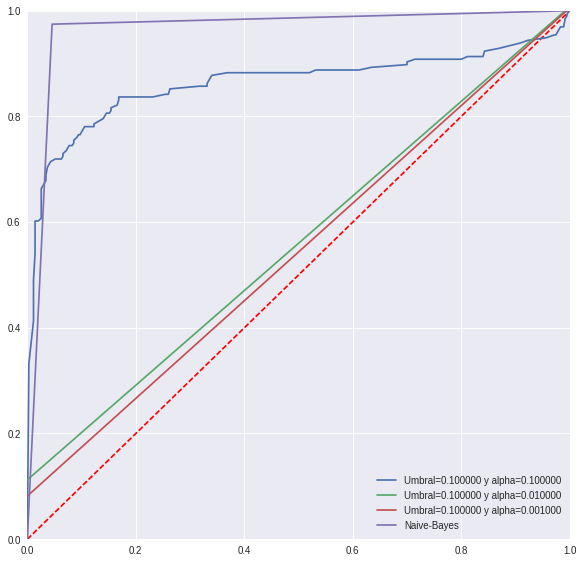

El numero de iteraciones que se realizaron fueron:40 
Con alpha = 0.100000 y un umbral =0.010000
El numero de iteraciones que se realizaron fueron:49 
Con alpha = 0.010000 y un umbral =0.010000
El numero de iteraciones que se realizaron fueron:1 
Con alpha = 0.001000 y un umbral =0.010000


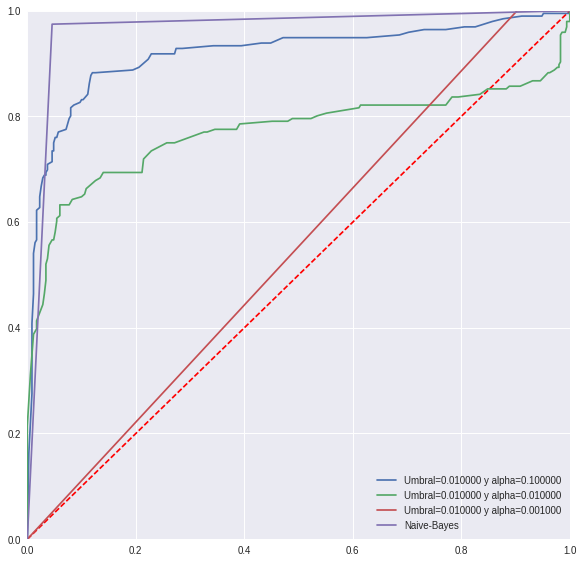

El numero de iteraciones que se realizaron fueron:643 
Con alpha = 0.100000 y un umbral =0.000100
El numero de iteraciones que se realizaron fueron:2450 
Con alpha = 0.010000 y un umbral =0.000100
El numero de iteraciones que se realizaron fueron:5257 
Con alpha = 0.001000 y un umbral =0.000100


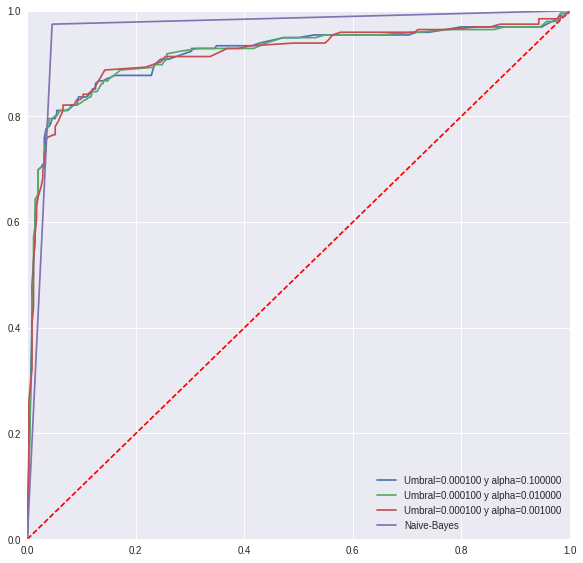

In [8]:
#umbrales_convergencia = [0.1,0.01,0.0001,0.0001]
#alpha_s = [0.1,0.15,0.2,0.5]

#Test_Code#
umbrales_convergencia = [0.1,0.01,0.0001]
alpha_s = [0.1,0.01,0.001]
iteraciones_log=[]
thetas_ml=[]
for umbral in umbrales_convergencia:
    fig = plt.figure(num=None, figsize=(10,10), dpi=70, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.set_yscale('linear')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    thetas_ml=[]
    for alp in alpha_s:
        theta_emv,N_iteraciones = descenso_gradiente(X_train, y_train,umbral_convergencia=umbral,alpha=alp)
        thetas_ml.append((theta_emv,N_iteraciones,alp))
        print "================================================================"
        print ("El numero de iteraciones que se realizaron fueron:%i \nCon alpha = %f y un umbral =%f" % (N_iteraciones,alp,umbral))
        print "================================================================" 
        y_score = logistica(np.dot(X_train, theta_emv))
        fp_l, tp_l = get_ROC(y_score,y_train)
        #print fp_l, tp_l
        plt.plot(fp_l, tp_l,label='Umbral=%f y alpha=%f'%(umbral,alp))
    iteraciones_log.append((umbral,thetas_ml))
    plt.plot(fp_naive,tp_naive,label='Naive-Bayes')
    ax.legend()
    plt.show()